In [1]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "pauper"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipList = ['/decklist/modern-challenge-32-2025-08-3112812792', '/decklist/modern-challenge-64-2025-08-3012812786']

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["date"] >= startDate
        if x["url"] not in skipList
    ]

    print(urlList)

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

['/decklist/pauper-challenge-32-2025-08-3112812801', '/decklist/pauper-league-2025-08-319535', '/decklist/pauper-challenge-32-2025-08-3012812783', '/decklist/pauper-league-2025-08-309535', '/decklist/pauper-challenge-32-2025-08-2912812769', '/decklist/pauper-league-2025-08-299535', '/decklist/pauper-league-2025-08-289535', '/decklist/pauper-league-2025-08-279535', '/decklist/pauper-league-2025-08-269535', '/decklist/pauper-league-2025-08-259535', '/decklist/pauper-challenge-32-2025-08-3112812801', '/decklist/pauper-league-2025-08-319535', '/decklist/pauper-challenge-32-2025-08-3012812783', '/decklist/pauper-league-2025-08-309535', '/decklist/pauper-challenge-32-2025-08-2912812769', '/decklist/pauper-league-2025-08-299535', '/decklist/pauper-league-2025-08-289535', '/decklist/pauper-league-2025-08-279535', '/decklist/pauper-league-2025-08-269535', '/decklist/pauper-league-2025-08-259535']


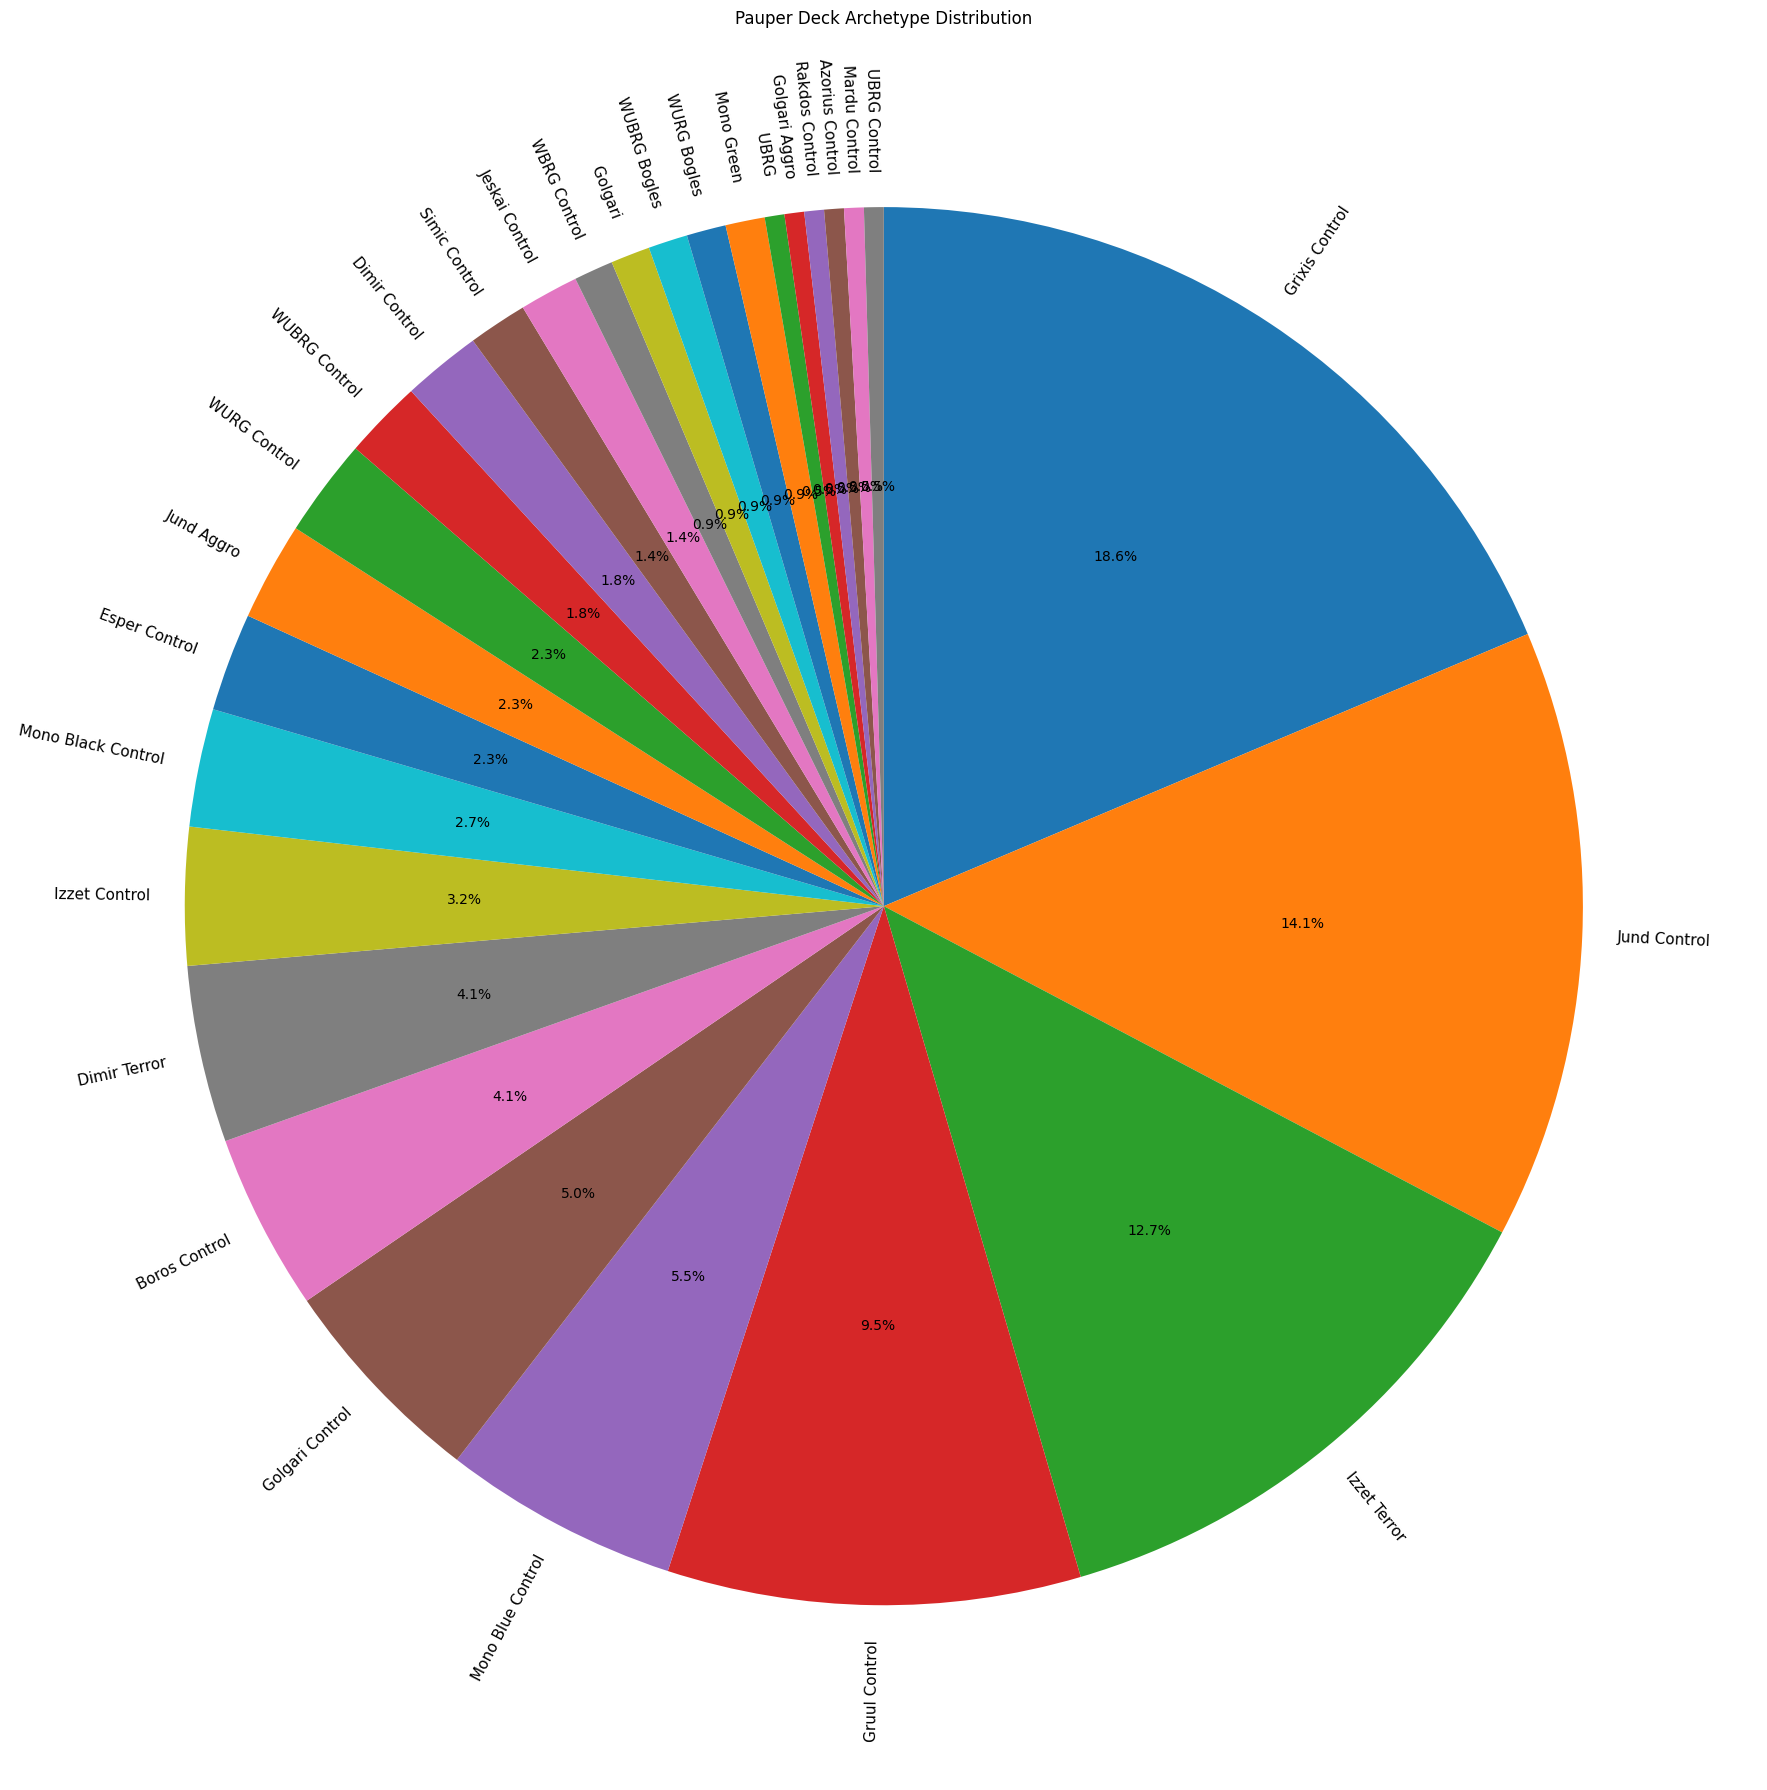

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

179 deck(s) without any of the specified key cards
Jund Control


Main/Side  \
Deck URL                                         Deck               
/decklist/pauper-challenge-32-2025-08-2912812769 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Side   

                                                                     Card Name  \
Deck URL                                         Deck                            
/decklist/pauper-challenge-32-2025-08-2912812769 Deck 1            Candy Trail   
                                                 Deck 1            Candy Trail   
                                                 Deck 1  Eviscerator's Insight   
                                                 Deck 1  Eviscerator's Insight   
                                                 Deck 1         Expedition Map   
                                                 Deck 1         Expedition Map   
                                                 Deck 1      Malevolent Rumble   
                                                 Deck 1      Malevolent Rumble   
                                                 Deck 1              Pyroblast   
                                                 Deck 1              Pyroblast   
                                   

In [4]:
includedCardList = []
excludedCardList = []
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)

Card Name
Mountain                   7.63
Island                     7.40
Forest                     3.60
Swamp                      3.16
Lightning Bolt             2.44
                           ... 
Structural Distortion      0.01
Sylvok Lifestaff           0.01
Brave the Wilds            0.01
Union of the Third Path    0.01
Woodland Chasm             0.01
Name: Quantity, Length: 398, dtype: float64

In [5]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Mountain                   1678
Island                     1628
Forest                      792
Swamp                       696
Lightning Bolt              536
                           ... 
Structural Distortion         2
Sylvok Lifestaff              2
Brave the Wilds               2
Union of the Third Path       2
Woodland Chasm                2
Name: Quantity, Length: 398, dtype: int64